# Homework3 
#### In this assignment, you will design, implement, and evaluate the appropriate models for given data.
### Goal of this assignment is to help you to solve HW4. (which  takes high  proportion of grading)<br><br><i>Do your best to solve the problems below, but don't be too intence on HW3 in order not to be exhausted.</i>
<br>
Version 1 (2017-04-07 pm 03:00) 

* Datasets which included in Scikit-learn will be used.
* Perform the steps described below selectively(i.e. on your choice) for each dataset.
>0. Preprocess; normalization, feature selection, etc.
>1. Model selection; characteristics of datasets need to be comprehended.
>2. Evaluation; This step should be done properly to prevent overfitting problem.
>3. Enhancement; parameter tuning and feature selection, etc.

In [24]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd

## Dataset 1: Boston house-prices dataset

* <h3>GOAL<br>: Predict <b>house price</b> using given features.</h3>
* First, you need to check <b>shape of dataset</b>; # of samples, # of features

In [25]:
boston = datasets.load_boston()
#Let's check shape of dataset. How many samples and features do you received?
n_samples = boston.data.shape[0]
n_features = boston.data.shape[1]

print "Total samples available:", n_samples
print "Total features available:", n_features

Total samples available: 506
Total features available: 13


* You can check information of each featurea from below table.

| Feature | Description |
|-----------------|-------------------------|
|CRIM|     per capita crime rate by town|
|ZN       |proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|    proportion of non-retail business acres per town|
|CHAS  |   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX    |  nitric oxides concentration (parts per 10 million)|
|RM    |   average number of rooms per dwelling|
|AGE   |   proportion of owner-occupied units built prior to 1940|
|DIS    |  weighted distances to five Boston employment centres|
|RAD   |   index of accessibility to radial highways|
|TAX   |   full-value property-tax rate per one thousand dollor |
|PTRATIO|  pupil-teacher ratio by town |
|B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT  |  % lower status of the population|
##### <center>Table: Feature information of Boston house-price data set</center>


###  Analyze and evaluate given data.

> *There are no guidelines or strict answers for this assignment.<br/>
> <b>Try various methods to improve model performance</b>, but the reason for your choice should be attached in this report.*

> \* Be careful not to make errors such as overfitting problem.<br/>

> *(As an example of "various methods", some irrelevant/less relevant features can be removed. It can be done by human intuition, as well as through machine learning models. a.k.a. feature selection (Step 4))*

## Step 1: Preprocess
- Let's apply various preprocessing operations which we learned in lecture / assignments.
- Try best to choose correct preprocessing method for each feature types.<br/>
\* *hint: First, you need to know how values of each features look like.*

In [26]:
#TODO: Modify the dataset for analysis.

X = boston.data
Y = boston.target

df1 = pd.DataFrame(X, columns = boston.feature_names)
df1['target'] = Y

train = df1.sample(frac=0.8, random_state = 100)
test = df1.drop(train.index)

## Step 2: Select appropriate model
- Is it a <b>regression problem</b>? or a <b>classification problem</b>?
- There are various models, most of them are *avilable as API*. (we recommend you to browse them in scikit-learn)
- We can not decide which model will have better performance.<br/>(Although the model is limited by the size of the data and the number of samples)
- So, list models which, you think, will perform good. (import them)

In [27]:
#TODO: Import APIs which you want to use
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split


import matplotlib.pyplot as plt
%matplotlib inline


y_train = train.pop('target')
x_train = train

y_test = test.pop('target')
x_test = test

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step 3: Evaluation
- Evaluate the performance each models which you <b>imported at step2</b>.
- Please choose an evaluation method and apply it on your model. (e.g. separation of test-train set, cross validation, etc.)
- Do you think the performance you get is enough? If not, consider how you can improve model performance and apply it on Step 4

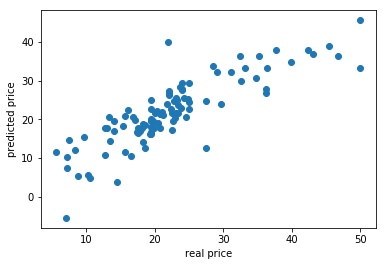

MSE - train: 21.4392008304
MSE - test: 25.2879565486


In [28]:
#TODO: Evaluate each models. Is performance sufficient?
def plot_2D_lr(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data)
    
    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)        
    
    plt.show()
    
predicted = regr.predict(x_test)

plot_2D_lr(y_test, predicted, pred=None, x_label='real price', y_label='predicted price', title=None)

print "MSE - train: %s" % mean_squared_error(regr.predict(x_train), y_train)
print "MSE - test: %s" % mean_squared_error(predicted, y_test)

## Step 4: Enhencement
Advice :
1. Try <b>feature selection</b>
2. <b>Adjust the parameter</b> of the model
3. Apply <b>more complex</b> model.<br/>
(*For example it would be better to use various models and take average("ensemble") rather then use just a single model.
In fact, Random Forest, which is well known ensemble algorithm, gets result by taking average of the result of decision tree models.*)


- You do not need to achieve state-of-the-art.
- But you need to show a <b>reasonable performance improvement</b>.
- Please <b>describe about your design</b> in following markdown cell. (small modifications are okay if there are reasons.)

In [29]:
#TODO: Try various methods to improve model performance, It is recommended to follow the previous steps[step1-3].
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

for deg in range(4):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), linear_model.LinearRegression())

    plr = PolynomialRegression.fit(x_train, y_train)
    print "MSE - sklearn poly-linear regression; degree=", deg,"\n\ttrain: ", mean_squared_error(plr.predict(x_train), y_train), ",\tval: ", mean_squared_error(plr.predict(x_val), y_val)
    

MSE - sklearn poly-linear regression; degree= 0 
	train:  85.133093508 ,	val:  81.5989721103
MSE - sklearn poly-linear regression; degree= 1 
	train:  22.7776665231 ,	val:  19.9129049252
MSE - sklearn poly-linear regression; degree= 2 
	train:  5.99781316934 ,	val:  8.9760783838
MSE - sklearn poly-linear regression; degree= 3 
	train:  7.18892358098e-15 ,	val:  25410.9275211


### Description about design
> please write your description here (you can modify this cell by double click)

> 첫 모델링은 LinearRegression<br> 두번째 모델링은 PolynomialRegression
<br> 첫번째에 비해서 두번째의 MSE 가 더 작다
<br> 또한 degree가 증가함에 따라 MSE 두번째 모델링 방법의 MSE가 점점 작아지는 것을 확인할 수 있다.


## Dataset 2: Breast Cancer

* <h3>GOAL</h3>: Predict <b>presence of tumor</b> using biomedical features.

> Unlike the first dataset, this dataset is for binary classification problems.<br/>However, since it is made up of biomedical features, you might face some troubles when operating the feature selection.<br/>It could be quite embarrassing, but when you're actually doing data analysis, you will often face  features you do not know.

In [21]:
# Use the following code
bc = datasets.load_breast_cancer() # classification
print bc['feature_names'] #description for features

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Follow the steps for Dataset 1 to design and implement an experiment on Breast Cancer dataset.

> Likewise, it is <b>not necessary to show great performance</b>, but it must go through an appropriate evaluation method.<br/>
<b>A description of the model design</b> should be accompanied.

In [34]:
#TODO: write your code here 
# (Of course, it would be great to  have a model with good performance. 
# However, the performance will not affect the grading)
from sklearn.linear_model import SGDClassifier

X = bc.data
Y = bc.target

data = pd.DataFrame(X, columns = bc.feature_names)
data['target'] = Y

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

print "Model Accuracy: %f" % (100 * sgd.score(x_train, y_train))
print "Model Accuracy: %f" % (100 * sgd.score(x_test, y_test))

Model Accuracy: 84.615385
Model Accuracy: 85.964912


### Description about design
> please write your description here (you can modify this cell by double click)

> Classifier를 사용해서 모델링
<br> Model Accurancy 를 구해봤을 때 70~80%정도의 정확도를 보여주는것을 알 수 있다.